<a href="https://colab.research.google.com/github/Nikhilsain/ML_PROJECTS/blob/main/Life_Expectancy_Random_Forest_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING - LIBRARIES

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# IMPORT DATASET

In [23]:
dataset = pd.read_csv('Life Expectancy Data.csv')

for (columnName) in dataset.iteritems(): 
    print(columnName[0] ,'-', dataset[columnName[0]].dtype) 

Country - object
Year - int64
Status - object
Life expectancy  - float64
Adult Mortality - float64
infant deaths - int64
Alcohol - float64
percentage expenditure - float64
Hepatitis B - float64
Measles  - int64
 BMI  - float64
under-five deaths  - int64
Polio - float64
Total expenditure - float64
Diphtheria  - float64
 HIV/AIDS - float64
GDP - float64
Population - float64
 thinness  1-19 years - float64
 thinness 5-9 years - float64
Income composition of resources - float64
Schooling - float64


# Taking care of missing data and depend. and undepend. featers selections

In [24]:
dataset.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [25]:
for (columnName) in dataset.iteritems(): 
    if dataset[columnName[0]].dtype == 'int' :
       dataset[columnName[0]].fillna(int(dataset[columnName[0]].mean()), inplace=True)
    if dataset[columnName[0]].dtype == 'float' :
       dataset[columnName[0]].fillna(float(dataset[columnName[0]].mean()), inplace=True)


In [26]:
dataset.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [27]:
X = dataset.iloc[:, :].values
y = dataset.iloc[:, 3].values
X = np.delete(X, 3, 1)
X = np.delete(X, 0, 1)

In [28]:
print(X)

[[2015 'Developing' 263.0 ... 17.3 0.479 10.1]
 [2014 'Developing' 271.0 ... 17.5 0.47600000000000003 10.0]
 [2013 'Developing' 268.0 ... 17.7 0.47 9.9]
 ...
 [2002 'Developing' 73.0 ... 1.3 0.42700000000000005 10.0]
 [2001 'Developing' 686.0 ... 1.7 0.42700000000000005 9.8]
 [2000 'Developing' 665.0 ... 11.2 0.434 9.8]]


# Encoding

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))


# Training and Test Set

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Training the Random Forest Regression model on the Training set

In [31]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

# Predicting the Test set results

In [32]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[78.24 77.3 ]
 [66.33 66.6 ]
 [52.95 52.6 ]
 ...
 [73.09 72.6 ]
 [74.44 73.  ]
 [81.84 83.  ]]


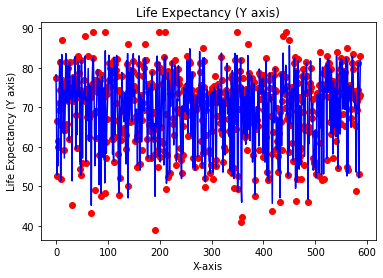

In [33]:
plt.scatter(np.arange(len(y_test)), y_test, color = 'red')
plt.plot(np.arange(len(y_test)), y_pred, color = 'blue')
plt.title('Life Expectancy (Y axis)')
plt.xlabel('X-axis')
plt.ylabel('Life Expectancy (Y axis)')
plt.show()

# Evaluating the Model Performance from R2 Value

In [21]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9526025954425028